<a href="https://colab.research.google.com/github/issacridhin/LabWorks/blob/CV/2348546_Lab5_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
src = cv.imread('/content/pexels-evg-kowalievska-1170986.jpg')

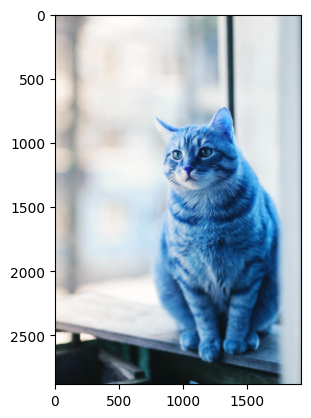

In [3]:
img = cv.cvtColor(src, cv.COLOR_BGR2RGB)
plt.imshow(src)

In [5]:
gray= cv.imread('/content/pexels-evg-kowalievska-1170986.jpg',0)

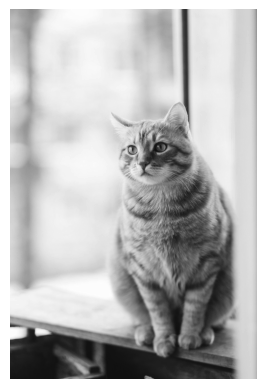

In [6]:
plt.imshow(gray, 'gray')
plt.axis('off')
plt.show()

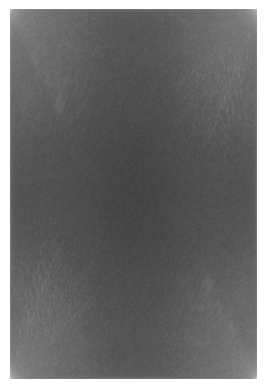

In [7]:
# image in frequency domain
G = np.fft.fft2(gray)
plt.imshow(np.log1p(np.abs(G)),cmap='gray')
plt.axis('off')
plt.show()

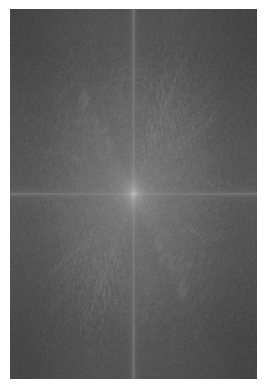

In [8]:
#Fourier transform
Fshift = np.fft.fftshift(G)
plt.imshow(np.log1p(np.abs(Fshift)),cmap='gray')
plt.axis('off')
plt.show()

Low Pass Filter

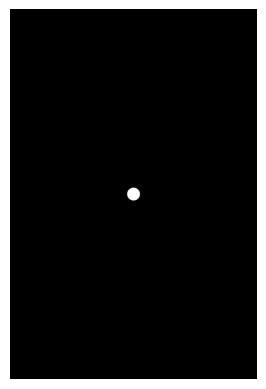

In [9]:
M,N = gray.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 50
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            H[u,v] = 1
        else:
            H[u,v] = 0
plt.imshow(H,cmap='gray')
plt.axis('off')
plt.show()

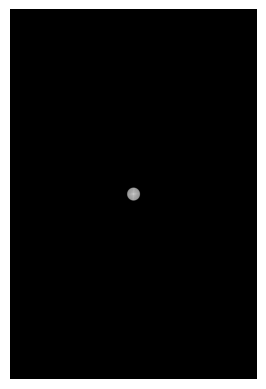

In [10]:
# Ideal Low Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

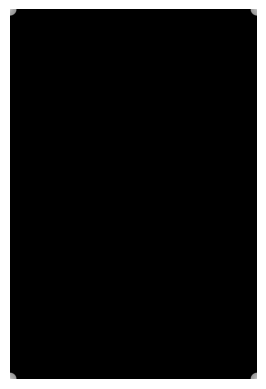

In [11]:
#Inversing the shifted Fourier Transform
Gi = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(Gi)),cmap='gray')
plt.axis('off')
plt.show()

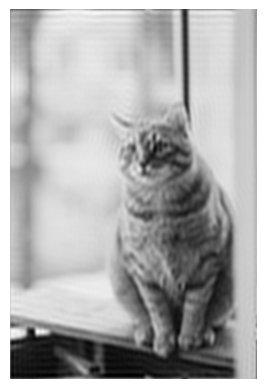

In [12]:
#Inverse the fourier transformation
g = np.abs(np.fft.ifft2(Gi))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

High Pass Filter

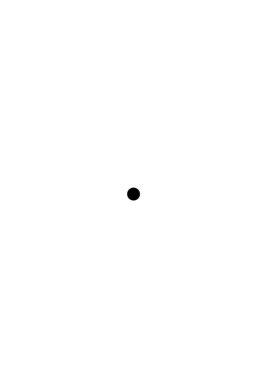

In [13]:
H = 1 - H
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

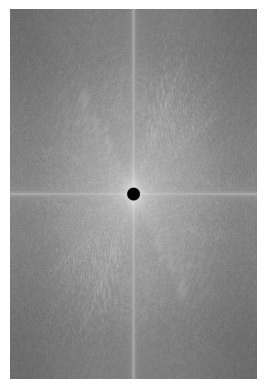

In [14]:
# Ideal High Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),cmap='gray')
plt.axis('off')
plt.show()

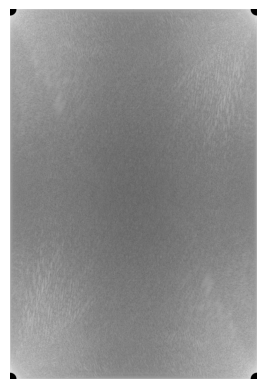

In [15]:
# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap='gray')
plt.axis('off')
plt.show()

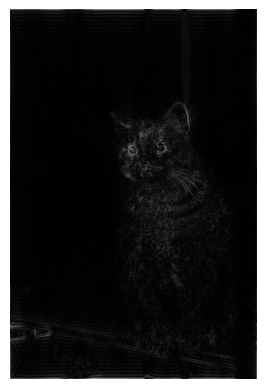

In [16]:
g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()